<h1><center> Proyecto final manejo de datos y visualización científica</center></h1>

In [1]:
from matplotlib import artist as art,pyplot as plt,animation
import numpy as np
import pandas as pd
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from datetime import datetime

%matplotlib inline

### 1. Encontrar y conocer un conjunto o conjuntos de datos. Obtener ese conjunto de datos. Describirlos (que columnas contienen, cuántos son, cómo leerlos, qué estructuras de datos utilizarlo).

In [2]:
# Lectura de los datos
datos = pd.read_csv("LicenciaturasMujeres.csv")

In [3]:
print'* El numero de columnas es:', len(datos.columns), '\n'
print'* Las columnas son: \n', datos.columns.values, '\n'
print'* Las filas son los años desde 1970 hasta el 2011'

* El numero de columnas es: 18 

* Las columnas son: 
['Year' 'Agriculture' 'Architecture' 'Art and Performance' 'Biology'
 'Business' 'Communications and Journalism' 'Computer Science' 'Education'
 'Engineering' 'English' 'Foreign Languages' 'Health Professions'
 'Math and Statistics' 'Physical Sciences' 'Psychology'
 'Public Administration' 'Social Sciences and History'] 

* Las filas son los años desde 1970 hasta el 2011


### 2. Identificar las oportunidades que ofrecen esos datos para una representación gráfica, para un análisis estadístico.

<h1><center>Diagrama de caja y bigotes</center></h1>

Un Box-Plot, también conocido como diagrama de caja y bigotes, es un gráfico que está basado en cuartiles y mediante el cual se visualiza la distribución de un conjunto de datos. Está compuesto por un rectángulo (la «caja») y dos brazos (los «bigotes»).

Es un gráfico que suministra información sobre los valores mínimo y máximo, los cuartiles Q1, Q2 o mediana y Q3, y sobre la existencia de valores atípicos y la simetría de la distribución. 


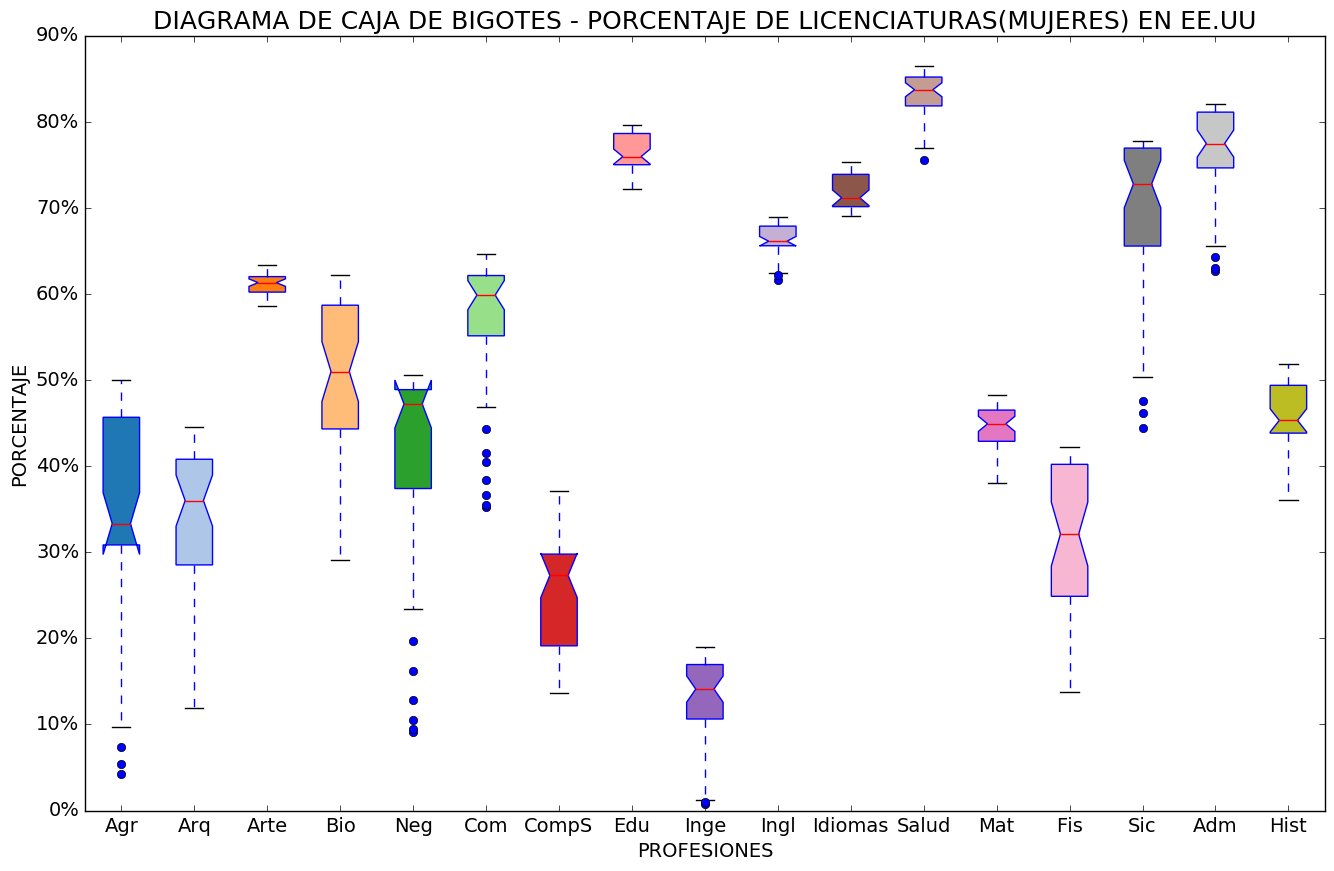

In [4]:
plt.figure(figsize=(16, 10))  

# Estos son los colores como RGB.    
Colores = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Escalar los valores RGB al rango [0, 1], que es el formato que matplotlib acepta.
for i in range(len(Colores)):    
    r, g, b = Colores[i]    
    Colores[i] = (r / 255., g / 255., b / 255.)    
    
Agr= datos["Agriculture"]
Arq = datos["Architecture"]
Art_Pert = datos["Art and Performance"]
Bio = datos["Biology"]
Neg = datos["Business"]
Com = datos["Communications and Journalism"]
CompS = datos["Computer Science"]
Edu = datos["Education"]
Inge = datos["Engineering"]
Ingl = datos["English"]
Idi = datos["Foreign Languages"]
salud = datos["Health Professions"]
Mat = datos["Math and Statistics"]
Fis = datos["Physical Sciences"]
Sic = datos["Psychology"]
Adm = datos["Public Administration"]
Hist = datos["Social Sciences and History"]

Prof = [Agr, Arq, Art_Pert, Bio, Neg, Com, CompS, Edu, Inge, Ingl, Idi, salud, Mat, Fis, Sic, Adm, Hist]
labels = ["Agr", "Arq", "Arte", "Bio", "Neg", "Com", "CompS", "Edu", "Inge", "Ingl", "Idiomas", "Salud", 
          "Mat", "Fis", "Sic", "Adm", "Hist"]

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

box = plt.boxplot(Prof,1 ,sym = 'mo', whis = 1.5, patch_artist=True)

for patch, color in zip(box['boxes'], Colores):
    patch.set_facecolor(color)

# Tamaño de los ticks de la grafica
plt.xticks(x, labels, fontsize=14)
plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)
plt.ylim(0, 90)      

plt.title(u'DIAGRAMA DE CAJA DE BIGOTES - PORCENTAJE DE LICENCIATURAS(MUJERES) EN EE.UU', fontsize=18)
plt.xlabel(u'PROFESIONES', fontsize=14)
plt.ylabel(u'PORCENTAJE', fontsize=14)

plt.savefig("DC_LicenciaturasMujeres-Usa.png", bbox_inches="tight") 

<h1><center>Diagrama de Violín</center></h1>

Un diagrama de violín se utiliza para visualizar la distribución de los datos y su densidad de probabilidad.

Este gráfico es una combinación de un diagrama de cajas y bigotes y un diagrama de densidad girado y colocado a cada lado, para mostrar la forma de distribución de los datos.

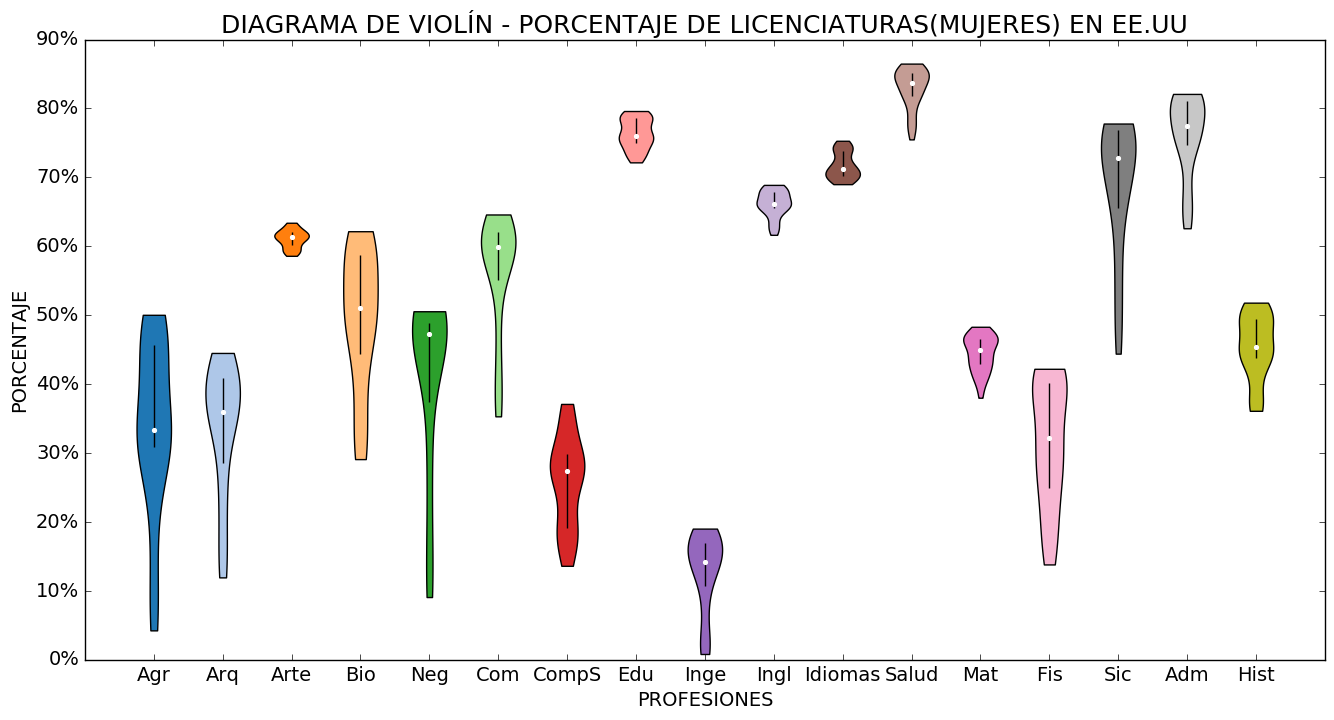

In [5]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

parts = plt.violinplot(Prof, showmeans=False, showmedians=False,showextrema=False)

for pc, color in zip(parts['bodies'], Colores):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1.)

q1, med, q3 = np.percentile(Prof, [25, 50, 75], axis=1)

inds = np.arange(1, len(med) + 1)
plt.scatter(inds, med, marker='.', color='white', s=30, zorder=3)
plt.vlines(inds, q1, q3, color='k', linestyle='-', lw=1)     

# Tamaño de los ticks de la grafica
s = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
plt.xticks(s, labels, fontsize=14)
plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)

plt.xlim(0,18)
plt.ylim(0, 90)      

plt.title(u'DIAGRAMA DE VIOLÍN - PORCENTAJE DE LICENCIATURAS(MUJERES) EN EE.UU', fontsize=18)
plt.xlabel(u'PROFESIONES', fontsize=14)
plt.ylabel(u'PORCENTAJE', fontsize=14)
plt.savefig("DV_PorcentajeLicenciaturasMujeres-Usa.png", bbox_inches="tight") 

### 3. Diseñar unos productos gráficos que puedan obtenerse a partir de los datos y que sirvan para mostrar las propiedades subyacentes a los mismos

<h1><center>Trazado básico</center></h1>

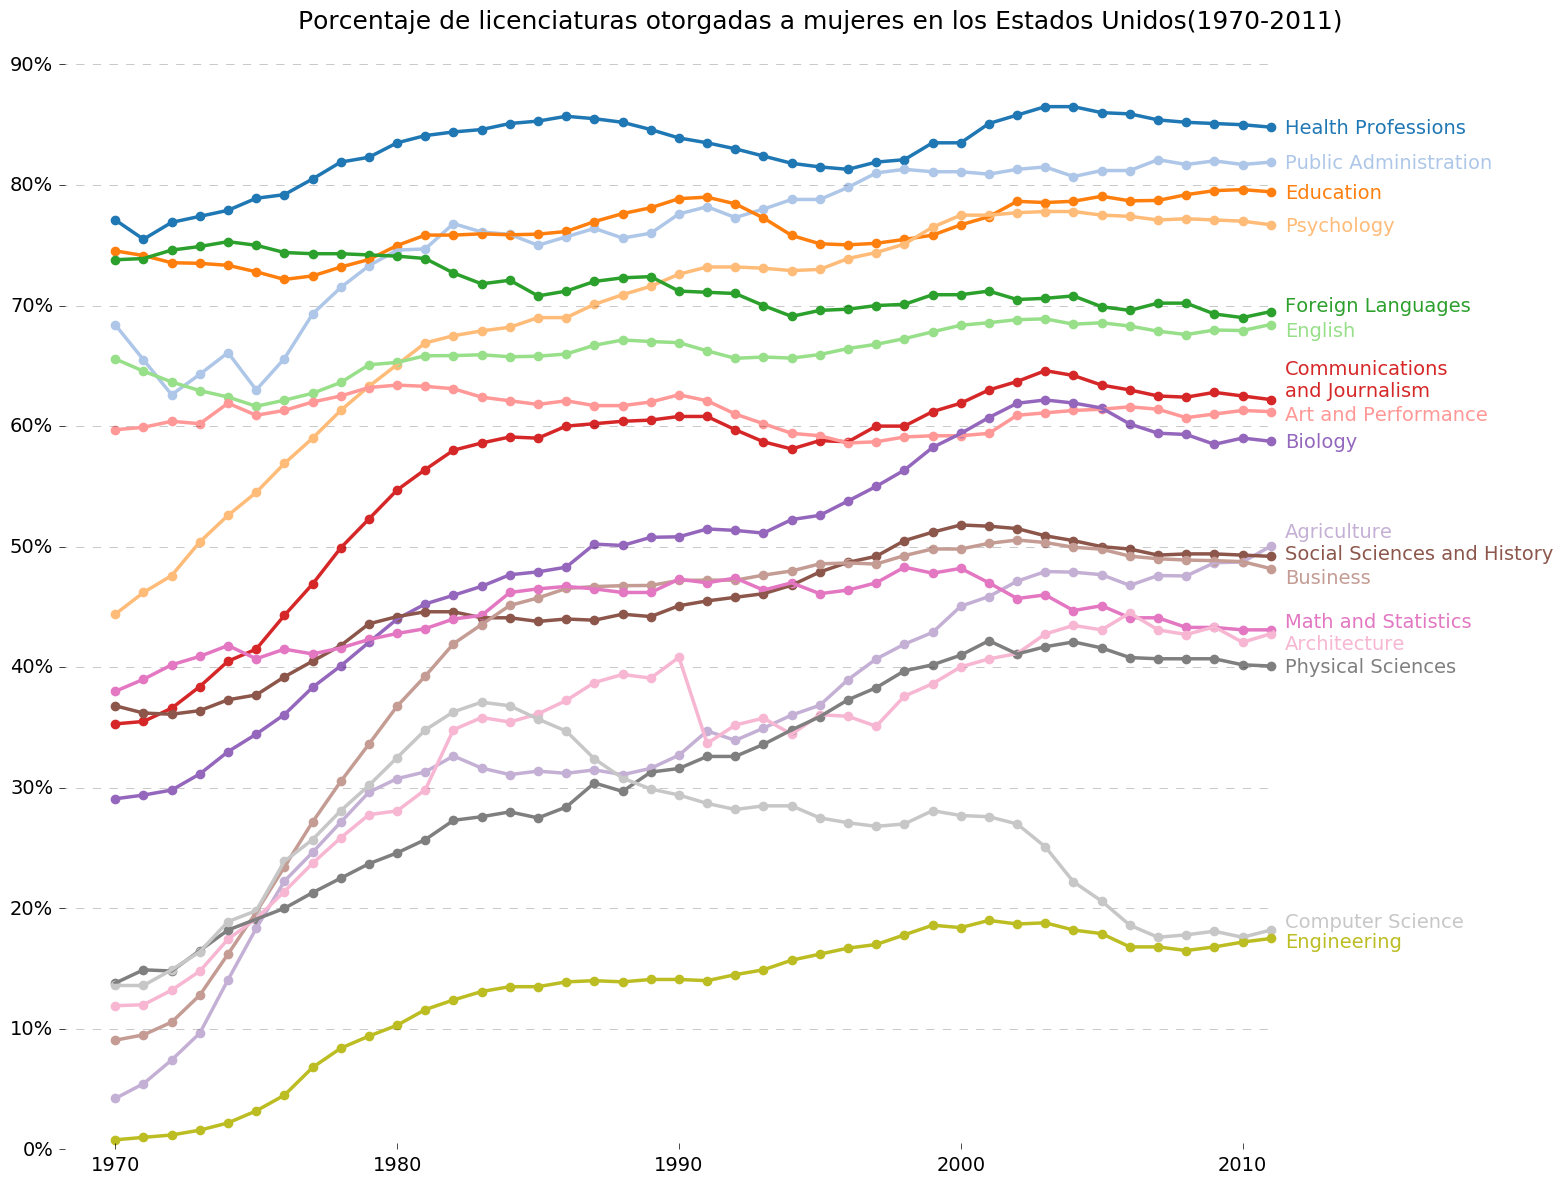

In [6]:
plt.figure(figsize=(16, 14))    

# Eliminar las líneas del marco del grafico
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

# Limites de la gráfica solo donde están los datos. 
plt.ylim(0, 90)    
plt.xlim(1968, 2012)    

# Tamaño de los ticks de la grafica
plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)
plt.xticks(fontsize=14)    
   
for y in range(10, 91, 10):    
    plt.plot(range(1968, 2012), [y] * len(range(1968, 2012)), "--", lw=0.5, color="black", alpha=0.3) 

# Listado de las profesiones de los datos
Profesiones = ['Health Professions', 'Public Administration', 'Education', 'Psychology',    
          'Foreign Languages', 'English', 'Communications\nand Journalism',    
          'Art and Performance', 'Biology', 'Agriculture',    
          'Social Sciences and History', 'Business', 'Math and Statistics',    
          'Architecture', 'Physical Sciences', 'Computer Science',    
          'Engineering']  

for rango, columna in enumerate(Profesiones):       
    plt.scatter(datos.Year.values,    
            datos[columna.replace("\n", " ")].values,    
            lw=2.5, color=Colores[rango])
    
    plt.plot(datos.Year.values,    
            datos[columna.replace("\n", " ")].values,    
            lw=2.5, color=Colores[rango]) 

    # Posicion en y
    y_pos = datos[columna.replace("\n", " ")].values[-1] - 0.5   
    
    # Se agregan compensaciones específicas y posición porque algunas etiquetas se superponen.  
    if columna == "Foreign Languages":    
        y_pos += 0.5    
    elif columna == "English":    
        y_pos -= 0.5    
    elif columna == "Communications\nand Journalism":    
        y_pos += 0.75    
    elif columna == "Art and Performance":    
        y_pos -= 0.25    
    elif columna == "Agriculture":    
        y_pos += 1.25    
    elif columna == "Social Sciences and History":    
        y_pos += 0.25    
    elif columna == "Business":    
        y_pos -= 0.75    
    elif columna == "Math and Statistics":    
        y_pos += 0.75    
    elif columna == "Architecture":    
        y_pos -= 0.75    
    elif columna == "Computer Science":    
        y_pos += 0.75    
    elif columna == "Engineering":    
        y_pos -= 0.25    
        
    plt.text(2011.5, y_pos, columna, fontsize=14, color=Colores[rango])    
    
plt.text (1995 , 93 , "Porcentaje de licenciaturas otorgadas a mujeres en los Estados Unidos"    
       "(1970-2011)", fontsize=18, ha = "center" ) 

plt.savefig("PorcentajeLicenciaturasMujeres-Usa.png", bbox_inches="tight") 

<h1><center>Diagrama de Barras</center></h1>

Un diagrama de barras, también conocido como diagrama de columnas, es una forma de representar gráficamente un conjunto de datos o valores, y está conformado por barras rectangulares de longitudes proporcionales a los valores representados. Los gráficos de barras son usados para comparar dos o más valores. Las barras pueden orientarse horizontal o verticalmente.

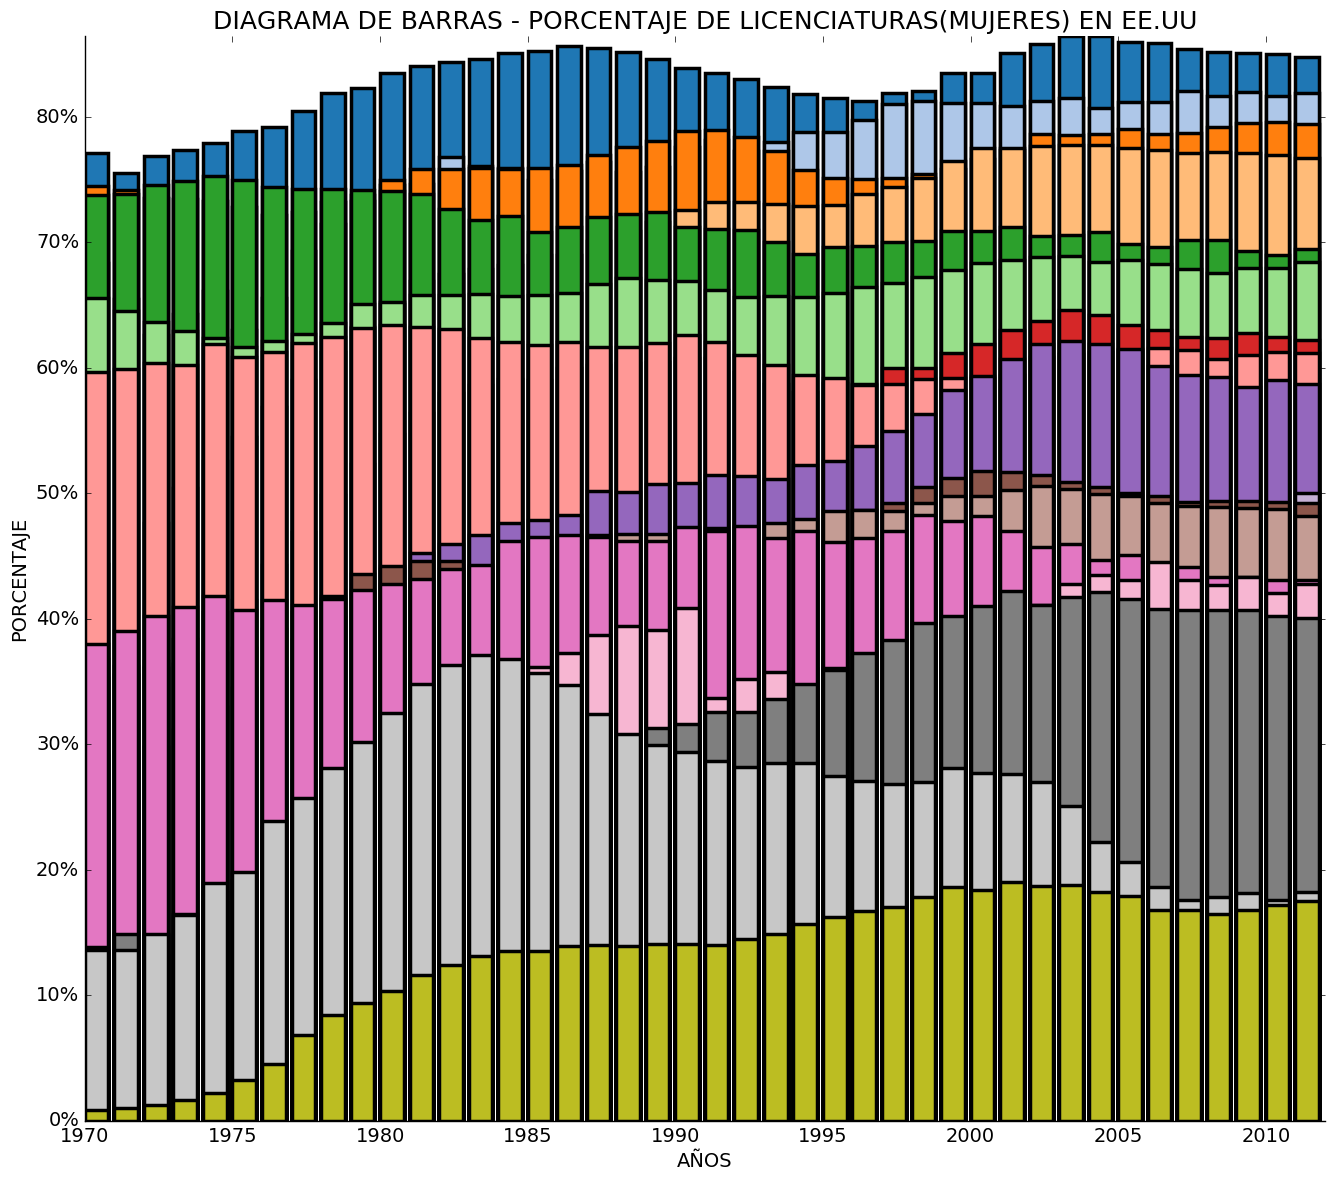

In [14]:
plt.figure(figsize=(16, 14))    

# Eliminar las líneas del marco del grafico
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)        
ax.spines["right"].set_visible(False)    

plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)
plt.xticks(fontsize=14)    
    
for rango, columna in enumerate(Profesiones):       
    plt.bar(datos.Year.values, datos[columna.replace("\n", " ")].values,
            lw=2.5, color=Colores[rango])
    
    y_pos = datos[columna.replace("\n", " ")].values[-1] - 0.5 
    
plt.xlim(1970, 2012)
plt.title(u'DIAGRAMA DE BARRAS - PORCENTAJE DE LICENCIATURAS(MUJERES) EN EE.UU', fontsize=18)
plt.xlabel(u'AÑOS', fontsize=14)
plt.ylabel(u'PORCENTAJE', fontsize=14)
plt.savefig("DB_PorcentajeLicenciaturasMujeres-Usa.png", bbox_inches="tight") 

<h1><center>Coordenadas Paralelas</center></h1>

Las coordenadas paralelas son una técnica de trazado para trazar datos multivariables. Le permite a uno ver clusters en datos y estimar visualmente otras estadísticas. El uso de puntos de coordenadas paralelas se representa como segmentos de línea conectados. Cada línea vertical representa un atributo. Un conjunto de segmentos de línea conectados representa un punto de datos. Los puntos que tienden a agruparse aparecerán más juntos.

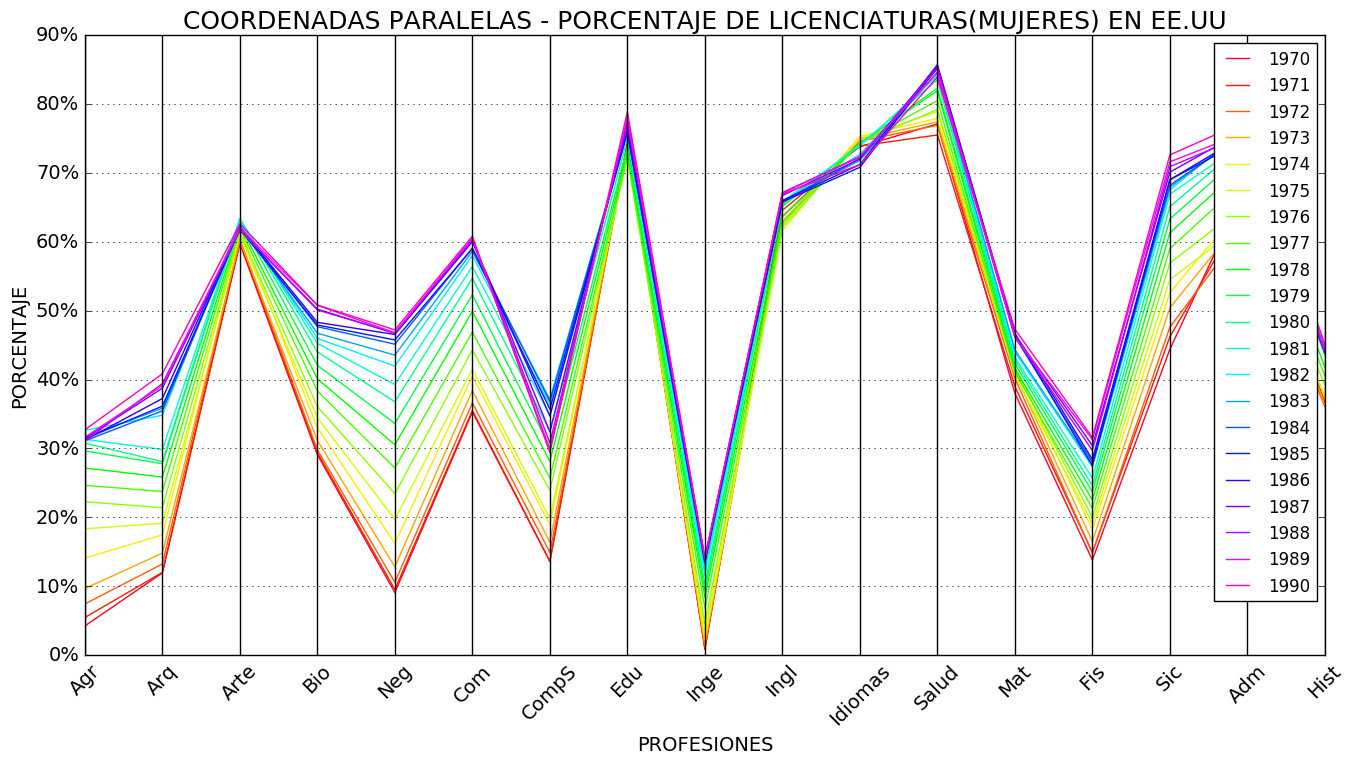

In [9]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

# Datos en los años menores a 1990
d2 = datos[datos.Year < 1991]

# Limites de la gráfica solo donde están los datos. 
plt.ylim(0, 90)      

# Tamaño de los ticks de la grafica
plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)
plt.xticks(fontsize=14)

parallel_coordinates(d2, 'Year', colormap='gist_rainbow')
ax.set_xticklabels(labels, rotation=45)

plt.title(u'COORDENADAS PARALELAS - PORCENTAJE DE LICENCIATURAS(MUJERES) EN EE.UU', fontsize=18)
plt.xlabel(u'PROFESIONES', fontsize=14)
plt.ylabel(u'PORCENTAJE', fontsize=14)
plt.savefig("CP_PorcentajeLicenciaturasMujeres-Usa.png", bbox_inches="tight") 

### Bibliografía 

* Pandas, tomado de:  
    https://pybonacci.es/2014/05/30/pandas-i/

* Diagrama de cajas y bigotes, tomado de:  
    https://es.wikipedia.org/wiki/Diagrama_de_caja
    
* Diagrama de violín, tomado de:  
    https://datavizcatalogue.com/ES/metodos/diagrama_de_violin.html
    
* Diagrama de barras, tomado de:  
    https://es.wikipedia.org/wiki/Diagrama_de_barras
    
* Coordenadas polares, tomado de:  
    https://pandas.pydata.org/pandas-docs/stable/visualization.html